# K-Vecinos más cercanos con Scikit-learn

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


## Lectura de los datos

In [5]:
datos_cancer = pd.read_csv("./wdbc.data", header=None)

X = datos_cancer.loc[:, 2:].to_numpy()
X = (X - X.mean(axis = 0))/X.std(axis = 0)

Y = datos_cancer.loc[:,1].to_numpy()

## Separación de datos en conjuntos de entrenamiento y prueba

Como prueba inicial, se utilizaran el 70% de los datos para entrenar el modelo y el 30% para calcular el error de prueba.

In [6]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size = 0.7)

## Ajuste de modelo

In [7]:
num_vecinos = 2
metric = "euclidean"

ClassKVecinos = KNeighborsClassifier(n_neighbors = num_vecinos, metric = metric, n_jobs = -1)
ClassKVecinos

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=2)

In [8]:
ClassKVecinos.fit(X = Xtrain, y = Ytrain)

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=2)

In [9]:
Labels_KVecinos = ClassKVecinos.predict(X = Xtest)

## Evaluación de modelo

Obtenemos la matriz de confusión comparando las etiquetas dadas por el modelo con las etiquetas reales (Ytest VS Labels_KVecinos)

In [10]:
confusion_matrix(y_true = Ytest, y_pred = Labels_KVecinos)

array([[102,   0],
       [  8,  61]])

Calculamos el _accuracy_ del modelo con los datos de prueba

In [11]:
accuracy_score(y_true = Ytest, y_pred = Labels_KVecinos)

0.9532163742690059

## Revisión de modelo para diferentes vecinos

Para entender el comportamiento del modelo de K-Vecinos con nuestros datos de entrenamiento, generaremos 512 conjuntos aleatorios y calcularemos la metrica de _accuracy_ correspondiente para cada $k$ vecinos considerados.

In [12]:
vals_k_vecinos = range(1, 64, 2)
reps = 512
metric = "euclidean"

In [13]:
accuracy_mean_scores = []
accuracy_std_scores = []

# Para cada "k" numero de vecinos...
for k_vecinos in vals_k_vecinos:

    # Creamos la instancia del modelo para "k" vecinos
    ClassKVecinos = KNeighborsClassifier(n_neighbors = k_vecinos, metric = metric, n_jobs = -1)

    # Repetimos la clasificacion "reps" veces
    accuracy_k_scores = np.zeros(reps)
    for r in range(reps):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size = 0.7)

        ClassKVecinos.fit(X = Xtrain, y = Ytrain)
        Labels_KVecinos = ClassKVecinos.predict(X = Xtest)

        accuracy_k_scores[r] = accuracy_score(y_true = Ytest, y_pred = Labels_KVecinos)

    # Obtener la media y desviacion estandar de las "reps" accuracy obtenidas
    accuracy_mean_scores.append(accuracy_k_scores.mean())
    accuracy_std_scores.append(accuracy_k_scores.std())

accuracy_mean_scores = np.array(accuracy_mean_scores)
accuracy_std_scores = np.array(accuracy_std_scores)

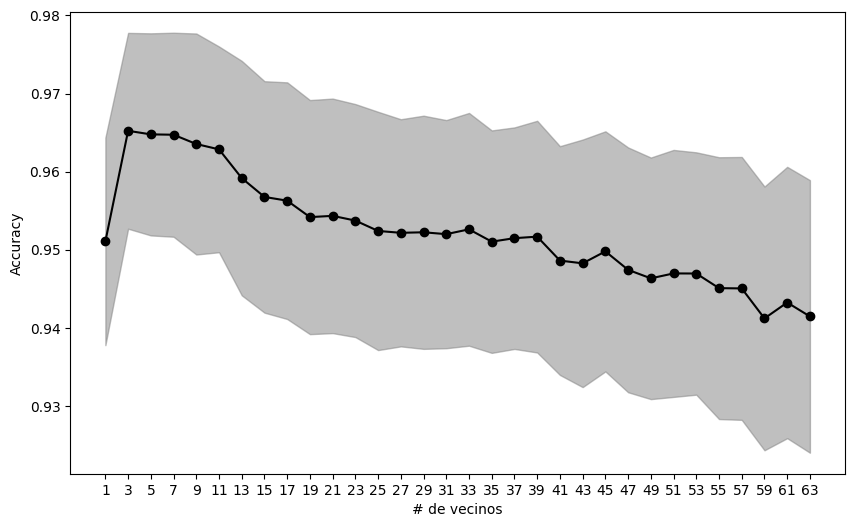

In [14]:
Figure1, Subplots1 = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 6))

Subplots1.fill_between(x = vals_k_vecinos, y1 = accuracy_mean_scores + accuracy_std_scores, y2 = accuracy_mean_scores - accuracy_std_scores, alpha = 0.5, color = "grey")
Subplots1.plot(vals_k_vecinos, accuracy_mean_scores, "-ok")
Subplots1.set_ylabel("Accuracy")
Subplots1.set_xlabel("# de vecinos")
Subplots1.set_xticks(vals_k_vecinos, vals_k_vecinos)
plt.show()

Se observa un comportamiento en caida para el accuracy conforme el número de vecinos aumenta, pero se observa un comportamiento estable para 3, 5, 7 y 9 vecinos.

¿Cómo elegimos el número de vecinos "óptimo"?
Por el principio de $\textit{parsimonia}$...